In [3]:
# Stock IPO Data Analysis - Anmol Arun

In [4]:
# Objective: Develop a predictive model to estimate the listing price of an IPO based on features such as subscription, GMP, and IPO size.

In [5]:
ipo_df="/content/drive/MyDrive/Dataset/Mainline IPO GMP Performance.csv"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [7]:
ipo_df = pd.read_csv(ipo_df)

In [8]:
ipo_df

,IPO,Listing Date,IPO_Size,Subscription,GMP,IPO Price,Estimated Price,Estimated Percentage,Listing Price,Listing Percentage,LT Price,LT Percentage
0,"ASK Automotive IPO (ASKAUTOLTD,544022)",15-11-2023,834.00,51.14,28,282,310,9.93,303,7.55,294.0,4.43
1,Protean eGov Technologies IPO (544021),13-11-2023,490.33,23.86,48,792,840,6.06,792,0.00,1109.0,40.04
2,"ESAF Small Finance IPO (ESAFSFB,544020)",10-11-2023,463.00,77.00,16,60,76,26.67,71,18.33,68.0,13.58
3,"Honasa Consumer Limited IPO (HONASA,544014)",07-11-2023,1701.44,7.61,24,324,348,7.41,330,1.85,475.0,46.64
4,"Cello World Limited IPO (CELLO,544012)",06-11-2023,1900.00,41.69,160,648,808,24.69,829,27.93,781.0,20.54
...,...,...,...,...,...,...,...,...,...,...,...,...
147,"UTI AMC IPO (UTIAMC,543238)",12-10-2020,8420.74,2.31,-14,554,540,-2.53,500,-9.75,790.0,42.62
148,"CAMS IPO (NA,543232)",01-10-2020,2242.00,46.99,328,1230,1558,26.67,1518,23.41,2786.0,126.54
149,"Chemcon IPO (CHEMCON,543233)",01-10-2020,284.00,149.30,310,340,650,91.18,731,115.00,264.0,-22.35
150,Angel Broking IPO (),05-10-2020,600.00,3.94,-5,306,301,-1.63,275,-10.13,NaN,NaN


In [9]:
ipo_df.set_index("Listing Date")

,IPO,IPO_Size,Subscription,GMP,IPO Price,Estimated Price,Estimated Percentage,Listing Price,Listing Percentage,LT Price,LT Percentage
Listing Date,,,,,,,,,,,
15-11-2023,"ASK Automotive IPO (ASKAUTOLTD,544022)",834.00,51.14,28,282,310,9.93,303,7.55,294.0,4.43
13-11-2023,Protean eGov Technologies IPO (544021),490.33,23.86,48,792,840,6.06,792,0.00,1109.0,40.04
10-11-2023,"ESAF Small Finance IPO (ESAFSFB,544020)",463.00,77.00,16,60,76,26.67,71,18.33,68.0,13.58
07-11-2023,"Honasa Consumer Limited IPO (HONASA,544014)",1701.44,7.61,24,324,348,7.41,330,1.85,475.0,46.64
06-11-2023,"Cello World Limited IPO (CELLO,544012)",1900.00,41.69,160,648,808,24.69,829,27.93,781.0,20.54
...,...,...,...,...,...,...,...,...,...,...,...
12-10-2020,"UTI AMC IPO (UTIAMC,543238)",8420.74,2.31,-14,554,540,-2.53,500,-9.75,790.0,42.62
01-10-2020,"CAMS IPO (NA,543232)",2242.00,46.99,328,1230,1558,26.67,1518,23.41,2786.0,126.54
01-10-2020,"Chemcon IPO (CHEMCON,543233)",284.00,149.30,310,340,650,91.18,731,115.00,264.0,-22.35


In [10]:
ipo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IPO                   152 non-null    object 
 1   Listing Date          152 non-null    object 
 2   IPO_Size              152 non-null    float64
 3   Subscription          152 non-null    float64
 4   GMP                   152 non-null    int64  
 5   IPO Price             152 non-null    int64  
 6   Estimated Price       152 non-null    int64  
 7   Estimated Percentage  152 non-null    float64
 8   Listing Price         152 non-null    int64  
 9   Listing Percentage    152 non-null    float64
 10  LT Price              143 non-null    float64
 11  LT Percentage         143 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 14.4+ KB


In [11]:
ipo_df.isna().sum()

IPO                     0
Listing Date            0
IPO_Size                0
Subscription            0
GMP                     0
IPO Price               0
Estimated Price         0
Estimated Percentage    0
Listing Price           0
Listing Percentage      0
LT Price                9
LT Percentage           9
dtype: int64

In [12]:
ipo_df.fillna(ipo_df.mean(), inplace=True)

<ipython-input-12-5c331a42b6a4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ipo_df.fillna(ipo_df.mean(), inplace=True)


In [13]:
ipo_df

,IPO,Listing Date,IPO_Size,Subscription,GMP,IPO Price,Estimated Price,Estimated Percentage,Listing Price,Listing Percentage,LT Price,LT Percentage
0,"ASK Automotive IPO (ASKAUTOLTD,544022)",15-11-2023,834.00,51.14,28,282,310,9.93,303,7.55,294.000000,4.430000
1,Protean eGov Technologies IPO (544021),13-11-2023,490.33,23.86,48,792,840,6.06,792,0.00,1109.000000,40.040000
2,"ESAF Small Finance IPO (ESAFSFB,544020)",10-11-2023,463.00,77.00,16,60,76,26.67,71,18.33,68.000000,13.580000
3,"Honasa Consumer Limited IPO (HONASA,544014)",07-11-2023,1701.44,7.61,24,324,348,7.41,330,1.85,475.000000,46.640000
4,"Cello World Limited IPO (CELLO,544012)",06-11-2023,1900.00,41.69,160,648,808,24.69,829,27.93,781.000000,20.540000
...,...,...,...,...,...,...,...,...,...,...,...,...
147,"UTI AMC IPO (UTIAMC,543238)",12-10-2020,8420.74,2.31,-14,554,540,-2.53,500,-9.75,790.000000,42.620000
148,"CAMS IPO (NA,543232)",01-10-2020,2242.00,46.99,328,1230,1558,26.67,1518,23.41,2786.000000,126.540000
149,"Chemcon IPO (CHEMCON,543233)",01-10-2020,284.00,149.30,310,340,650,91.18,731,115.00,264.000000,-22.350000
150,Angel Broking IPO (),05-10-2020,600.00,3.94,-5,306,301,-1.63,275,-10.13,708.664336,70.294056


In [14]:
ipo_df.isna().sum()

IPO                     0
Listing Date            0
IPO_Size                0
Subscription            0
GMP                     0
IPO Price               0
Estimated Price         0
Estimated Percentage    0
Listing Price           0
Listing Percentage      0
LT Price                0
LT Percentage           0
dtype: int64

In [15]:
ipo_df.corr()

<ipython-input-15-247cdbb4d3ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ipo_df.corr()


,IPO_Size,Subscription,GMP,IPO Price,Estimated Price,Estimated Percentage,Listing Price,Listing Percentage,LT Price,LT Percentage
IPO_Size,1.000000,-0.199234,-0.097559,0.441196,0.302841,-0.209279,0.278103,-0.172930,0.017481,-0.159638
Subscription,-0.199234,1.000000,0.610436,-0.029750,0.212718,0.886358,0.228912,0.768767,0.136020,0.286020
GMP,-0.097559,0.610436,1.000000,0.428389,0.716705,0.677216,0.740861,0.612280,0.344420,0.041448
IPO Price,0.441196,-0.029750,0.428389,1.000000,0.937174,-0.039907,0.911005,-0.025875,0.593818,-0.138059
Estimated Price,0.302841,0.212718,0.716705,0.937174,1.000000,0.230662,0.989130,0.216421,0.591271,-0.090549
Estimated Percentage,-0.209279,0.886358,0.677216,-0.039907,0.230662,1.000000,0.260785,0.920001,0.114065,0.255637
Listing Price,0.278103,0.228912,0.740861,0.911005,0.989130,0.260785,1.000000,0.283377,0.562933,-0.094232
Listing Percentage,-0.172930,0.768767,0.612280,-0.025875,0.216421,0.920001,0.283377,1.000000,0.071836,0.171759
LT Price,0.017481,0.136020,0.344420,0.593818,0.591271,0.114065,0.562933,0.071836,1.000000,0.443941
LT Percentage,-0.159638,0.286020,0.041448,-0.138059,-0.090549,0.255637,-0.094232,0.171759,0.443941,1.000000


<ipython-input-16-10501dbe44b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(ipo_df.corr(), fignum=f.number)


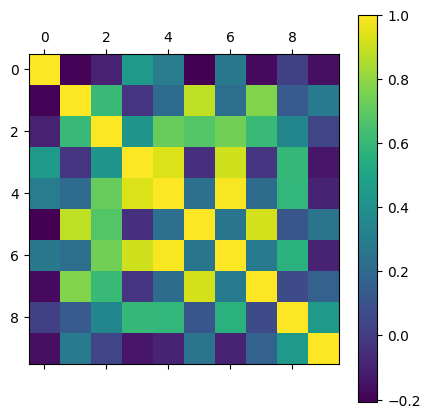

In [16]:
f = plt.figure(figsize=(5, 5))
plt.matshow(ipo_df.corr(), fignum=f.number)
cb = plt.colorbar()

In [17]:
ipo_df.describe()

,IPO_Size,Subscription,GMP,IPO Price,Estimated Price,Estimated Percentage,Listing Price,Listing Percentage,LT Price,LT Percentage
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1514.503829,46.681579,106.105263,455.888158,561.993421,24.305263,565.361842,24.816118,708.664336,70.294056
std,2615.125391,59.536088,182.924012,365.665999,473.795279,30.306422,488.955293,38.638264,675.736840,134.343405
min,60.000000,0.120000,-80.000000,25.000000,26.000000,-11.000000,25.000000,-23.730000,38.000000,-84.740000
25%,490.667500,3.612500,4.750000,184.000000,225.500000,1.912500,218.750000,0.277500,272.500000,4.277500
50%,747.500000,21.700000,36.500000,348.000000,439.500000,11.605000,437.000000,12.455000,543.500000,47.825000
75%,1398.760000,72.272500,125.500000,595.000000,766.750000,38.837500,752.500000,37.952500,843.500000,83.215000
max,20557.000000,326.490000,1110.000000,2150.000000,2240.000000,138.040000,2607.000000,249.690000,5123.000000,1306.790000


In [18]:
import seaborn
import plotly.express as px

In [19]:
fig = px.scatter(ipo_df,
                 x='IPO Price',
                 y='Listing Price',
                 opacity=0.8,
                 hover_data=['IPO Price'],
                 title='GMP vs LT Price')
fig.update_traces(marker_size=5)
fig.show()

In [20]:
!pip install scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
# Create inputs and targets
input_cols = ['GMP', 'IPO Price', 'Estimated Price', 'Estimated Percentage', 'IPO_Size', 'Subscription']
inputs, targets = ipo_df[input_cols], ipo_df['Listing Price']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)


Loss: 67.14669179571625


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [28]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 104.59897412937663


In [29]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 62.067533411385384


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
numeric_cols = ['GMP', 'IPO Price', 'Estimated Price', 'Estimated Percentage', 'IPO_Size', 'Subscription']
scaler = StandardScaler()
scaler.fit(ipo_df[numeric_cols])

StandardScaler()

In [32]:
scaled_inputs = scaler.transform(ipo_df[numeric_cols])
scaled_inputs

array([[-4.28393529e-01, -4.77110250e-01, -5.33619625e-01,
        -4.75898634e-01, -2.61078661e-01,  7.51335836e-02],
       [-3.18697073e-01,  9.22215790e-01,  5.88704919e-01,
        -6.04016477e-01, -3.92929356e-01, -3.84590641e-01],
       [-4.94211403e-01, -1.08622864e+00, -1.02913650e+00,
         7.82855256e-02, -4.03414646e-01,  5.10927882e-01],
       [-4.50332821e-01, -3.61871635e-01, -4.53151073e-01,
        -5.59324206e-01,  7.17189868e-02, -6.58436632e-01],
       [ 2.95603082e-01,  5.27111967e-01,  5.20941927e-01,
         1.27368616e-02,  1.47897513e-01, -8.41183930e-02],
       [-4.61302466e-01, -3.01508551e-01, -4.10799203e-01,
        -5.94084861e-01, -2.58673144e-01, -6.52706932e-01],
       [-4.83241758e-01,  1.34751921e-01, -8.25722141e-02,
        -6.86779941e-01, -3.71801478e-01, -3.30832566e-01],
       [-4.55817643e-01, -1.10269130e+00, -1.02701891e+00,
         6.05323268e-01, -5.53699962e-01,  1.92599545e+00],
       [-4.72272112e-01, -8.66726520e-01, -8.512

In [33]:
inputs = scaled_inputs
targets = ipo_df["Listing Price"]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 67.14669179571624


In [34]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(inputs, targets)
regr_2.fit(inputs, targets)

DecisionTreeRegressor(max_depth=5)

In [67]:
y_1 = regr_1.predict(inputs)
y_2 = regr_2.predict(inputs)

In [68]:
loss = rmse(targets, y_1)
print('Loss:', loss)

Loss: 151.30931623896828


In [69]:
loss = rmse(targets, y_2)
print('Loss:', loss)

Loss: 31.779277866203746


In [126]:
# Create and train the model
regr_2 = DecisionTreeRegressor(max_depth=5,random_state=42,max_leaf_nodes=20)
regr_2.fit(inputs_train, targets_train)

# Generate predictions
y_2 = regr_2.predict(inputs_test)



# Compute loss to evalute the model
loss = rmse(targets_test, y_2)
print('Test Loss:', loss)


Test Loss: 156.4000884264225


In [99]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-100, random_state=100)

In [100]:
model.fit(inputs_train,targets_train)

RandomForestRegressor(n_jobs=-100, random_state=100)

In [101]:
y_random=model.predict(inputs_test)

In [102]:
loss = rmse(targets_test, y_random)
print('Test Loss:', loss)


Test Loss: 174.86320049541584


In [133]:
from sklearn.tree import plot_tree, export_text

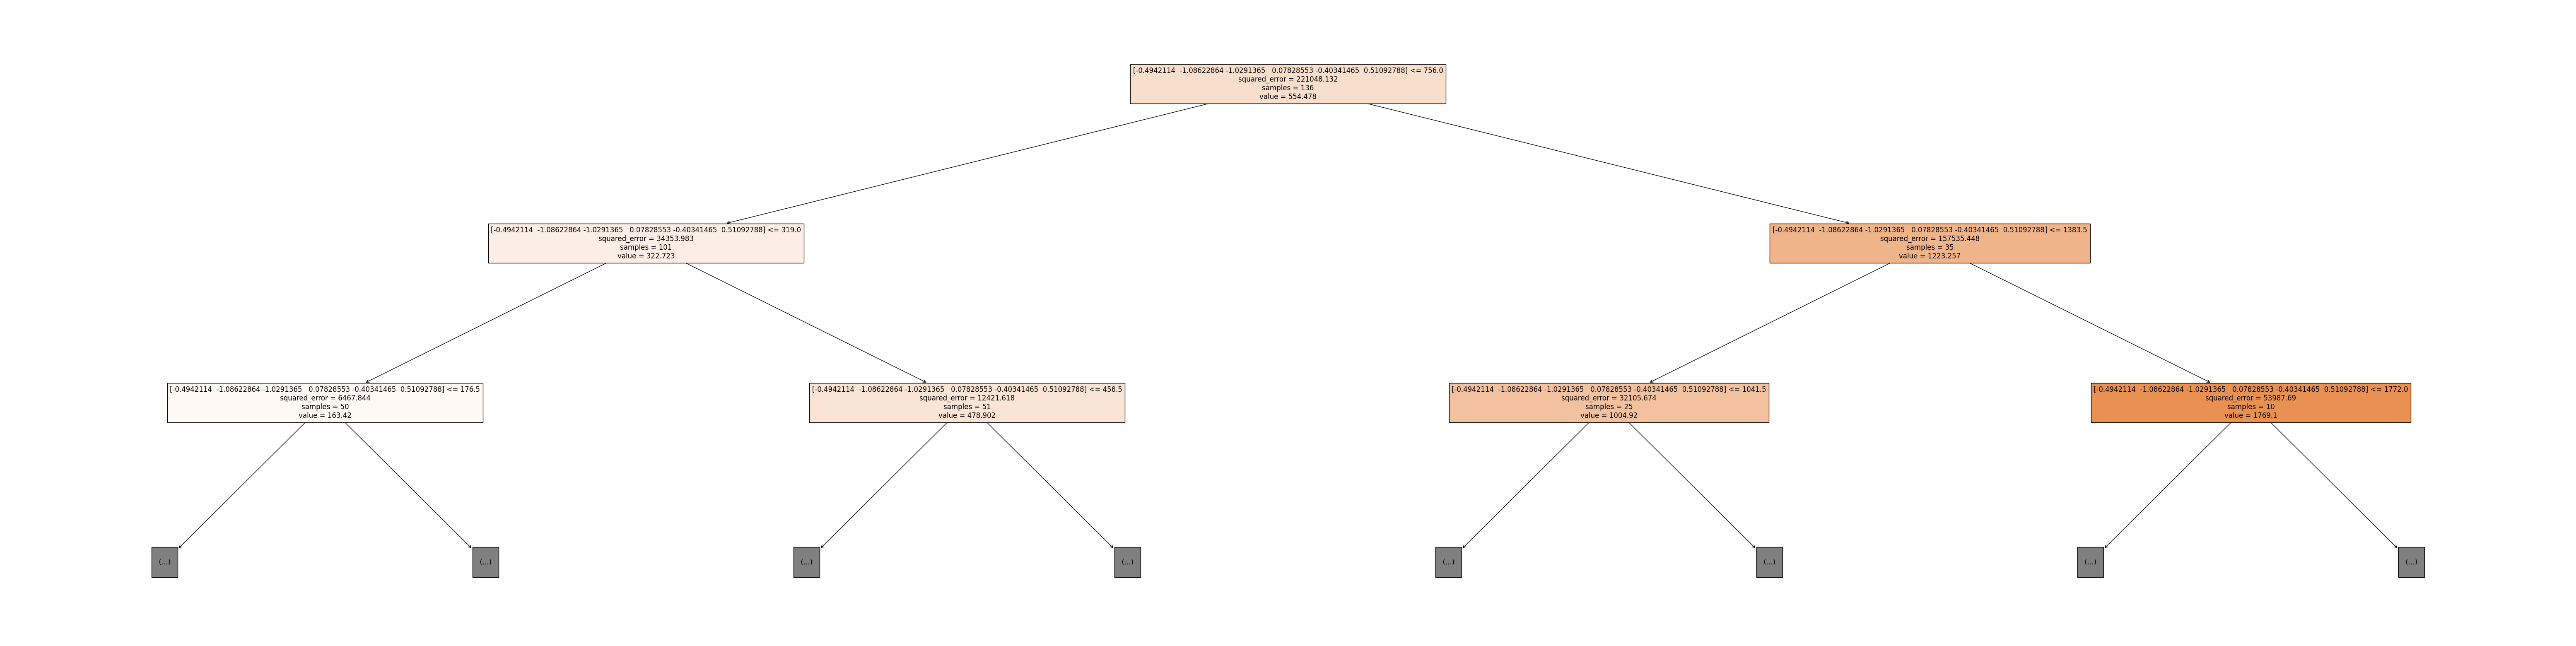

In [139]:
plt.figure(figsize=(80,20))
plot_tree(regr_2, feature_names=inputs, max_depth=2, filled=True);